# ML live coding tasks

## Linear Regression

1. Напишите реализацию линейной регрессии с нуля.\
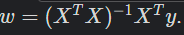\
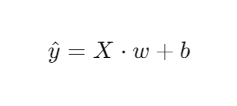

In [79]:
import numpy as np


class LinearRegression:
    def __init__(
        self,
        learning_rate: float = 0.01,
        n_iters: int = 1000,
        l1: float = 0.0,
        l2: float = 0.0,
    ):
        """
        :param learning_rate: Скорость обучения
        :param n_iters: Количество итераций для градиентного спуска
        :param l1: Коэффициент L1 регуляризации (по умолчанию 0)
        :param l2: Коэффициент L2 регуляризации (по умолчанию 0)
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.l1 = l1
        self.l2 = l2

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Регуляризация
            if self.l1 > 0:
                dw += self.l1 * np.sign(self.weights)

            if self.l2 > 0:
                dw += self.l2 * self.weights

            # Обновление параметров
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.dot(X, self.weights) + self.bias


In [80]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# Создание модели линейной регрессии
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X, y)

# Предсказания
predictions = regressor.predict(X)
print("Predictions:", predictions)


Predictions: [1.03425405 2.02113149 3.00800893 3.99488637 4.9817638 ]


## Logistic Regression

1. Напишите реализацию логистической     регрессии с нуля.\
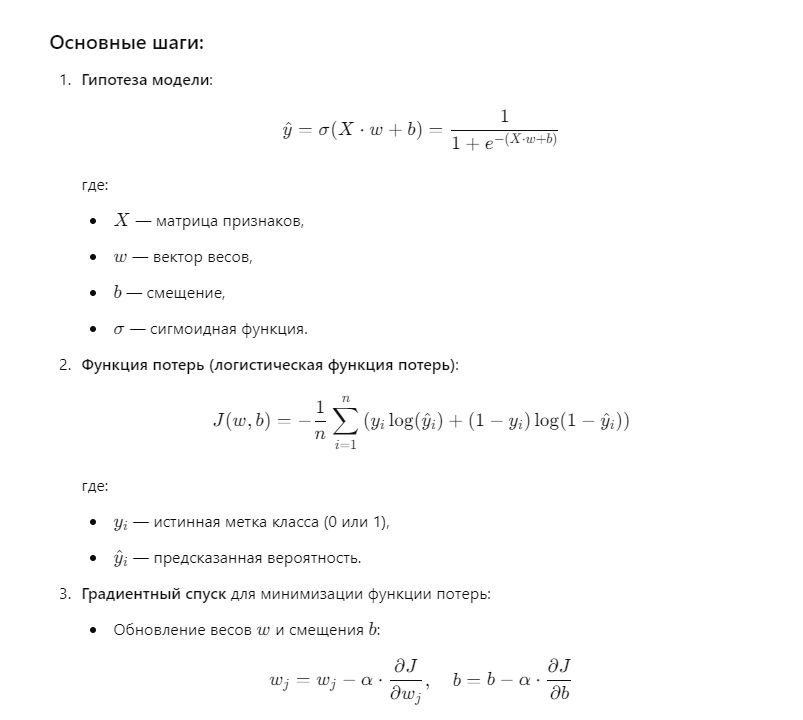

In [81]:
class LogisticRegression:
    def __init__(self, n_iters: int = 1000, learning_rate: float = 0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Вычисление сигмоидной функции.
        :param z: Линейная комбинация входных данных
        :return: Значение сигмоидной функции
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        self.bias = 0

        for _ in range(self.n_iters):
            # линейная комбинация входных признаков
            linear_model = np.dot(X, self.weights) + self.bias
            # применение сигмоидной функции для получения вероятности
            y_predicted = self.sigmoid(linear_model)

            # вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновление весов и смещения

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Возвращает предсказанные вероятности принадлежности к классу 1.
        :param X: Матрица признаков для предсказаний
        :return: Вектор предсказанных вероятностей
        """
        linear_model = np.dot(X, self.weights) + self.bias

        return self.sigmoid(linear_model)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Возвращает предсказанные классы (0 или 1) на основе вероятности.
        :param X: Матрица признаков для предсказаний
        :return: Вектор предсказанных классов (0 или 1)
        """
        y_predicted_proba = self.predict_proba(X)
        y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_proba]
        return np.array(y_predicted)


In [82]:
# Генерация данных (пример бинарной классификации)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 0, 1, 1])

# Создание модели логистической регрессии
classifier = LogisticRegression(learning_rate=0.1, n_iters=1000)
classifier.fit(X, y)

# Предсказания
predictions = classifier.predict(X)
print("Predicted classes:", predictions)
probabilities = classifier.predict_proba(X)
print("Predicted probabilities:", probabilities)


Predicted classes: [0 0 0 1 1]
Predicted probabilities: [0.01040881 0.06589298 0.32115275 0.76035024 0.95511296]


## KNN

Напишите реализацию Knn регрессора с нуля с использованием библиотеки python.

In [83]:
import math


class KNN:
    def __init__(self, k):
        # Конструктор класса KNN, принимает параметр k - количество соседей для учитывания
        self.k = k

    def fit(self, X_train, y_train):
        # Метод для обучения модели, принимает обучающие данные X_train и метки классов y_train
        self.X_train = X_train  # Обучающие данные
        self.y_train = y_train  # Метки классов для обучающих данных

    def predict(self, X_test):
        # Метод для предсказания меток классов для тестовых данных X_test
        predictions = []  # Инициализация списка предсказанных меток
        for x in X_test:
            # Для каждого тестового примера
            neighbors = self.get_neighbors(x)  # Получаем k ближайших соседей
            predicted_label = self.vote(
                neighbors
            )  # Проголосовать за класс среди соседей
            predictions.append(predicted_label)  # Добавить предсказанную метку в список
        return predictions  # Вернуть список предсказанных меток

    def euclidean_distance(self, x1, x2):
        # Метод для вычисления евклидова расстояния между двумя точками x1 и x2
        distance = 0  # Начальное значение расстояния
        for i in range(len(x1)):
            # Для каждой компоненты точек
            distance += (x1[i] - x2[i]) ** 2  # Добавить квадрат разности к расстоянию
        return math.sqrt(distance)  # Вернуть корень из суммы квадратов

    def get_neighbors(self, x):
        # Метод для получения k ближайших соседей для точки x
        distances = []  # Инициализация списка расстояний до соседей
        for i in range(len(self.X_train)):
            # Для каждой точки в обучающих данных
            dist = self.euclidean_distance(
                x, self.X_train[i]
            )  # Вычислить расстояние до точки x
            distances.append(
                (self.X_train[i], self.y_train[i], dist)
            )  # Добавить расстояние в список
        distances.sort(key=lambda x: x[2])  # Отсортировать список по расстояниям
        neighbors = [distances[i] for i in range(self.k)]  # Выбрать k ближайших соседей
        return neighbors  # Вернуть список ближайших соседей

    def vote(self, neighbors):
        # Метод для проголосовать за класс среди ближайших соседей
        votes = {}  # Словарь для подсчета голосов за каждый класс
        for neighbor in neighbors:
            # Для каждого соседа
            label = neighbor[1]  # Метка класса соседа
            if label in votes:
                votes[label] += 1  # Увеличить счетчик голосов
            else:
                votes[label] = 1  # Инициализировать счетчик голосов
        return max(
            votes, key=votes.get
        )  # Вернуть класс с наибольшим количеством голосов


In [84]:
# Генерация простых данных
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# Создаем и обучаем модель KNN для регрессии
knn_regressor = KNN(k=5)
knn_regressor.fit(X, y)

# Предсказания
predictions = knn_regressor.predict(X)
print("Predicted values:", predictions)


Predicted values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


In [85]:
# 2 вариант
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k=3):
        self.k = k  # Число ближайших соседей

    def fit(self, X_train, y_train):
        # Сохранение обучающих данных
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Вычисление расстояний до всех точек обучающей выборки
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        # Сортировка по расстояниям и выбор k ближайших соседей
        k_indices = np.argsort(distances)[: self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Выбор наиболее частого класса среди соседей
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _euclidean_distance(self, x1, x2):
        # Евклидово расстояние
        return np.sqrt(np.sum((x1 - x2) ** 2))


In [86]:
# Обучающая выборка (X - признаки, y - метки классов)
X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8], [8, 9]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Тестовые данные
X_test = np.array([[2, 2], [7, 7]])

# Создаем модель KNN с k=3
knn = KNN(k=3)

# Обучаем модель
knn.fit(X_train, y_train)

# Предсказываем классы для тестовой выборки
predictions = knn.predict(X_test)

print(f"Предсказания для тестовых данных: {predictions}")


Предсказания для тестовых данных: [0 1]


## TF-IDF 

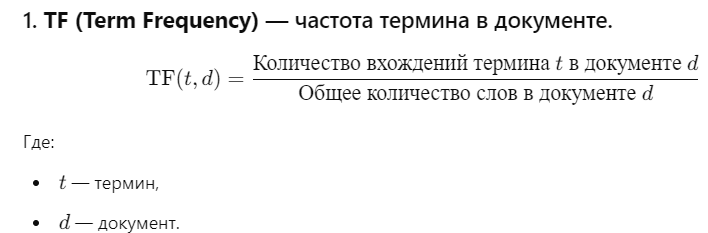


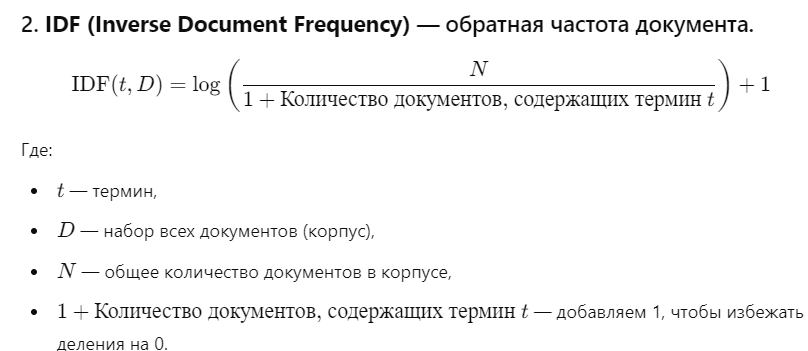

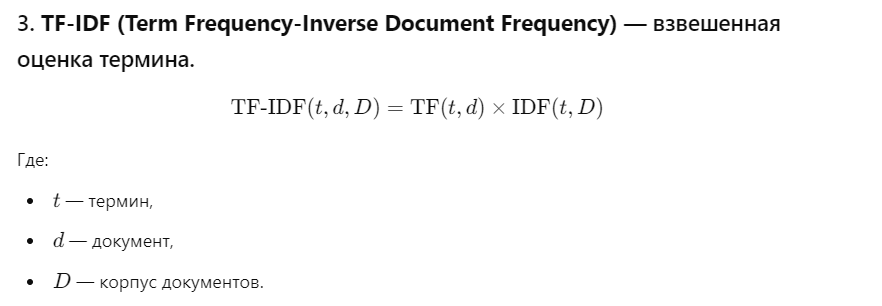

In [87]:
import math
from collections import Counter


# 1. Посчитаем TF (Term Frequency)
def compute_tf(document):
    term_count = Counter(document)
    total_terms = len(document)
    tf = {term: count / total_terms for term, count in term_count.items()}
    return tf


# 2. Посчитаем IDF (Inverse Document Frequency)
def compute_idf(corpus):
    total_documents = len(corpus)
    idf = {}
    all_terms = set(term for document in corpus for term in document)

    for term in all_terms:
        # Подсчёт количества документов, в которых встречается термин
        docs_with_term = sum(1 for document in corpus if term in document)
        idf[term] = (
            math.log(total_documents / (1 + docs_with_term)) + 1
        )  # Добавляем 1, чтобы избежать деления на ноль

    return idf


# 3. Вычисляем TF-IDF
def compute_tf_idf(corpus):
    tf_idf = []

    # Считаем IDF для всего корпуса
    idf = compute_idf(corpus)

    for document in corpus:
        # Считаем TF для каждого документа
        tf = compute_tf(document)
        # Вычисляем TF-IDF как произведение TF и IDF
        tf_idf_document = {term: tf_val * idf[term] for term, tf_val in tf.items()}
        tf_idf.append(tf_idf_document)

    return tf_idf


# Пример использования:
corpus = [
    ["машина", "едет", "быстро"],
    ["поезд", "едет", "медленно"],
    ["машина", "остановилась"],
]

tf_idf_scores = compute_tf_idf(corpus)
for i, scores in enumerate(tf_idf_scores):
    print(f"TF-IDF для документа {i+1}: {scores}")


TF-IDF для документа 1: {'машина': 0.3333333333333333, 'едет': 0.3333333333333333, 'быстро': 0.4684883693693881}
TF-IDF для документа 2: {'поезд': 0.4684883693693881, 'едет': 0.3333333333333333, 'медленно': 0.4684883693693881}
TF-IDF для документа 3: {'машина': 0.5, 'остановилась': 0.7027325540540822}
